In [4]:
# Sonuçların Yüklenmesi ve Genel Bilgiler
import matplotlib.pyplot as plt
import json
import pandas as pd
import seaborn as sns

# Sonuçları yükleme
with open('../results/results.json', 'r') as f:
    results = json.load(f)

# Genel sonuçları inceleme
print("Model Performans Özeti:")
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"Validation Accuracy: {metrics['eval_accuracy']:.4f}")
    print(f"Test Accuracy: {metrics['test_accuracy']:.4f}")
    
    if 'classification_report' in metrics:
        print("Classification Report:")
        report_df = pd.DataFrame(metrics['classification_report']).transpose()
        display(report_df)
    else:
        print("Classification Report bulunamadı.")


Model Performans Özeti:

Model: dbmdz/bert-base-turkish-uncased
Validation Accuracy: 0.9961
Test Accuracy: 0.9938
Classification Report:


,precision,recall,f1-score,support
0,0.993506,0.993506,0.993506,154.000000
1,0.994012,0.994012,0.994012,167.000000
accuracy,0.993769,0.993769,0.993769,0.993769
macro avg,0.993759,0.993759,0.993759,321.000000
weighted avg,0.993769,0.993769,0.993769,321.000000



Model: distilbert-base-uncased
Validation Accuracy: 0.9494
Test Accuracy: 0.9813
Classification Report:


,precision,recall,f1-score,support
0,0.993333,0.967532,0.980263,154.000000
1,0.970760,0.994012,0.982249,167.000000
accuracy,0.981308,0.981308,0.981308,0.981308
macro avg,0.982047,0.980772,0.981256,321.000000
weighted avg,0.981590,0.981308,0.981296,321.000000



Model: roberta-base
Validation Accuracy: 0.9572
Test Accuracy: 0.9813
Classification Report:


,precision,recall,f1-score,support
0,0.980519,0.980519,0.980519,154.000000
1,0.982036,0.982036,0.982036,167.000000
accuracy,0.981308,0.981308,0.981308,0.981308
macro avg,0.981278,0.981278,0.981278,321.000000
weighted avg,0.981308,0.981308,0.981308,321.000000


C:\Users\mitam-user-2\AppData\Local\Temp\ipykernel_20436\252182071.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


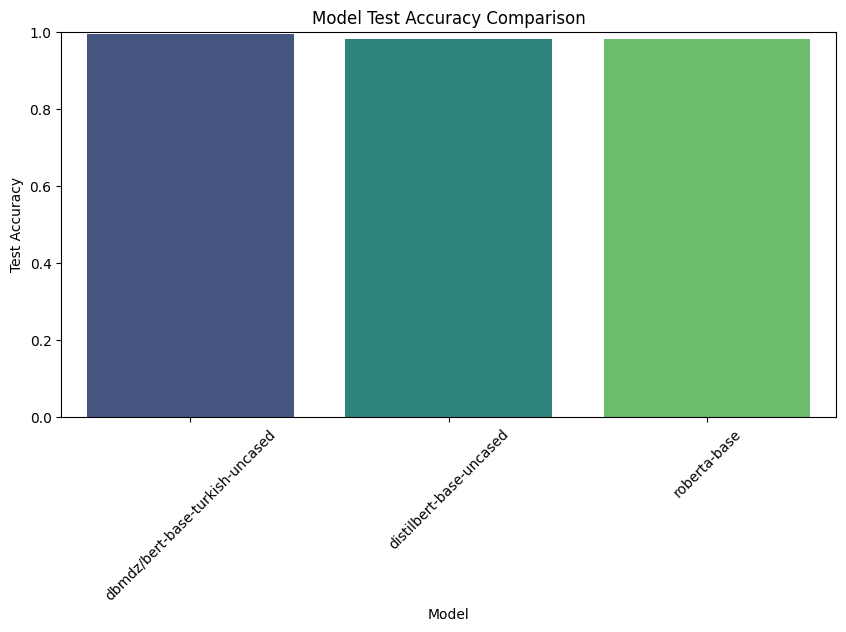

In [5]:
# Model doğruluk karşılaştırması
model_names = list(results.keys())
accuracies = [results[model]['test_accuracy'] for model in model_names]

plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Test Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()


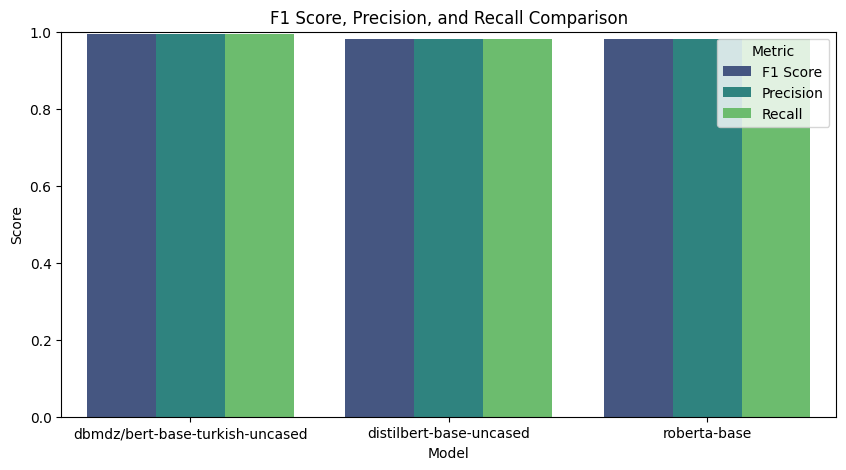

In [6]:
# F1 skoru, precision ve recall karşılaştırması
metrics_df = pd.DataFrame({
    'Model': model_names,
    'F1 Score': [results[model]['classification_report']['macro avg']['f1-score'] for model in model_names],
    'Precision': [results[model]['classification_report']['macro avg']['precision'] for model in model_names],
    'Recall': [results[model]['classification_report']['macro avg']['recall'] for model in model_names]
})

metrics_df = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_df, palette='viridis')
plt.title('F1 Score, Precision, and Recall Comparison')
plt.ylim(0, 1)
plt.show()


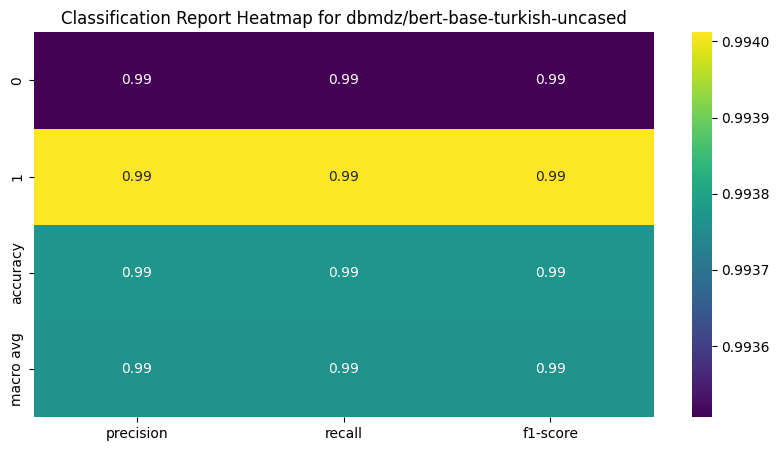

C:\Users\mitam-user-2\AppData\Local\Temp\ipykernel_20436\2721674098.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report_df.index[:-1], y=report_df['support'][:-1], palette='viridis')


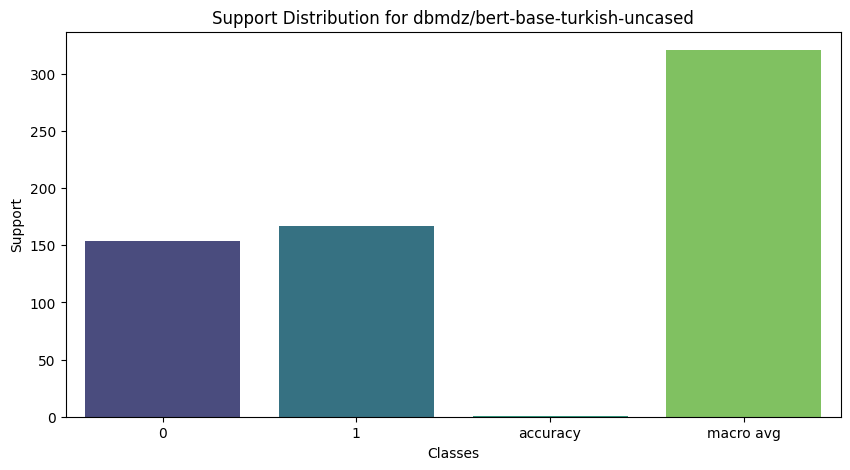

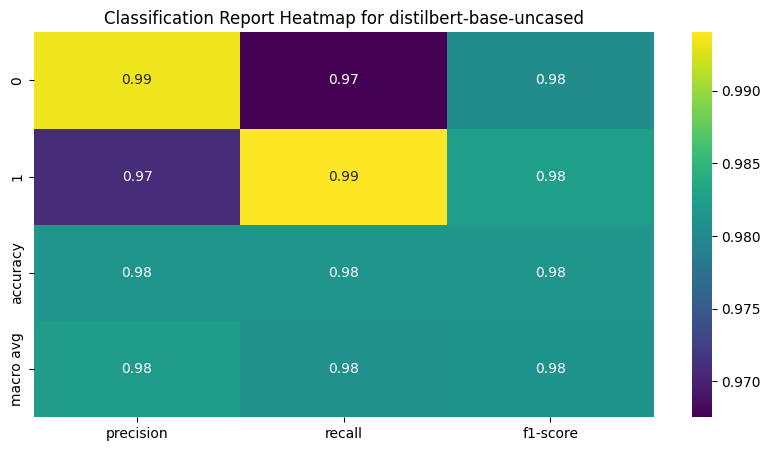

C:\Users\mitam-user-2\AppData\Local\Temp\ipykernel_20436\2721674098.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report_df.index[:-1], y=report_df['support'][:-1], palette='viridis')


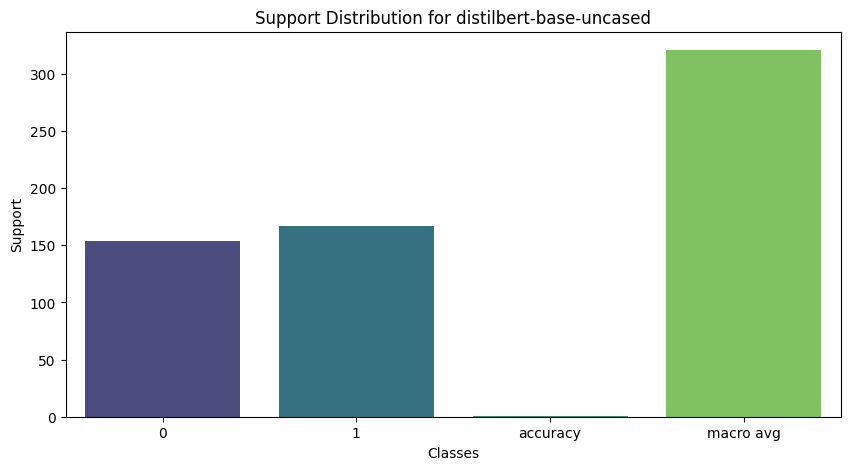

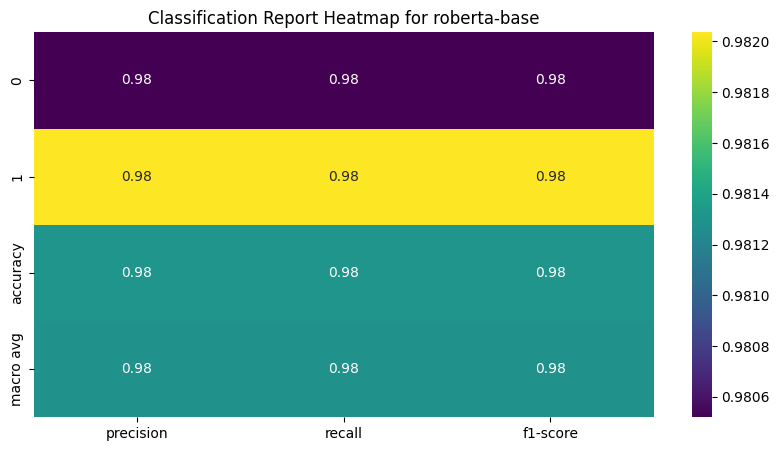

C:\Users\mitam-user-2\AppData\Local\Temp\ipykernel_20436\2721674098.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report_df.index[:-1], y=report_df['support'][:-1], palette='viridis')


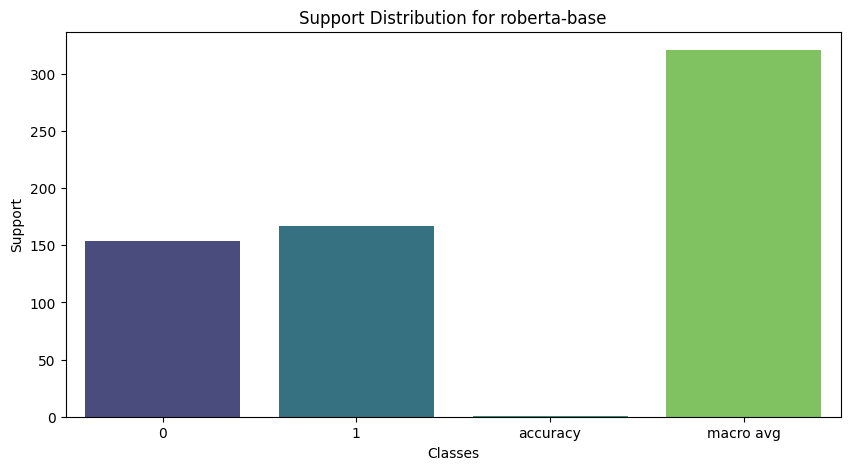

In [7]:
# Sınıflandırma raporunun detaylı analizi
for model_name in model_names:
    report_df = pd.DataFrame(results[model_name]['classification_report']).transpose()

    # Destek (support) sütunu dışında diğer sütunların ısı haritası olarak gösterimi
    plt.figure(figsize=(10, 5))
    sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='viridis', cbar=True, fmt=".2f")
    plt.title(f'Classification Report Heatmap for {model_name}')
    plt.show()
    
    # Destek (support) dağılımını inceleme
    plt.figure(figsize=(10, 5))
    sns.barplot(x=report_df.index[:-1], y=report_df['support'][:-1], palette='viridis')
    plt.title(f'Support Distribution for {model_name}')
    plt.xlabel('Classes')
    plt.ylabel('Support')
    plt.show()
